<a href="https://colab.research.google.com/github/sakshisinghh28/GOT-Network-analysis-/blob/main/Got-most-important-character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
book1 = pd.read_csv('/content/book1.csv')

#head of the dataset
print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [4]:
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

In [6]:
# Creating a list of networks for all the books
books = []
book_fnames = ['/content/book1.csv', '/content/book2.csv', '/content/book3.csv', '/content/book4.csv', '/content/book5.csv']

for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, row in book.iterrows():
        source = row['Source']
        target = row['Target']
        relationship_type = row['Type']

        # Add edges (relationships)
        G_book.add_edge(source, target, relationship=relationship_type, weight=row['weight'])

    # Append the graph to the list
    books.append(G_book)

# Printing out the number of nodes and edges for the first book
print(f"Number of nodes in book 1: {books[0].number_of_nodes()}")
print(f"Number of edges in book 1: {books[0].number_of_edges()}")


Number of nodes in book 1: 187
Number of edges in book 1: 684


In [10]:
import networkx as nx

# Function to get top N characters by degree centrality
def get_top_characters_by_degree_centrality(graph, top_n=15):
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(graph)

    # Sort characters by degree centrality in descending order
    sorted_characters = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

    # Get top N characters
    top_characters = sorted_characters[:top_n]

    return top_characters

# Top 15 characters in the first book
top_characters_book1 = get_top_characters_by_degree_centrality(books[0], top_n=15)
print("Top 15 characters in the first book by degree centrality:")
for character, centrality in top_characters_book1:
    print(f"{character}: {centrality}")

# Top 15 characters in the fifth book
top_characters_book5 = get_top_characters_by_degree_centrality(books[4], top_n=15)
print("\nTop 15 characters in the fifth book by degree centrality:")
for character, centrality in top_characters_book5:
    print(f"{character}: {centrality}")


Top 15 characters in the first book by degree centrality:
Eddard-Stark: 0.3548387096774194
Robert-Baratheon: 0.2688172043010753
Tyrion-Lannister: 0.24731182795698928
Catelyn-Stark: 0.23118279569892475
Jon-Snow: 0.19892473118279572
Robb-Stark: 0.18817204301075272
Sansa-Stark: 0.18817204301075272
Bran-Stark: 0.17204301075268819
Cersei-Lannister: 0.16129032258064518
Joffrey-Baratheon: 0.16129032258064518
Jaime-Lannister: 0.15591397849462366
Arya-Stark: 0.14516129032258066
Petyr-Baelish: 0.13978494623655915
Tywin-Lannister: 0.11827956989247312
Daenerys-Targaryen: 0.11290322580645162

Top 15 characters in the fifth book by degree centrality:
Jon-Snow: 0.1962025316455696
Daenerys-Targaryen: 0.18354430379746836
Stannis-Baratheon: 0.14873417721518986
Tyrion-Lannister: 0.10443037974683544
Theon-Greyjoy: 0.10443037974683544
Cersei-Lannister: 0.08860759493670886
Barristan-Selmy: 0.07911392405063292
Hizdahr-zo-Loraq: 0.06962025316455696
Asha-Greyjoy: 0.056962025316455694
Melisandre: 0.053797468354

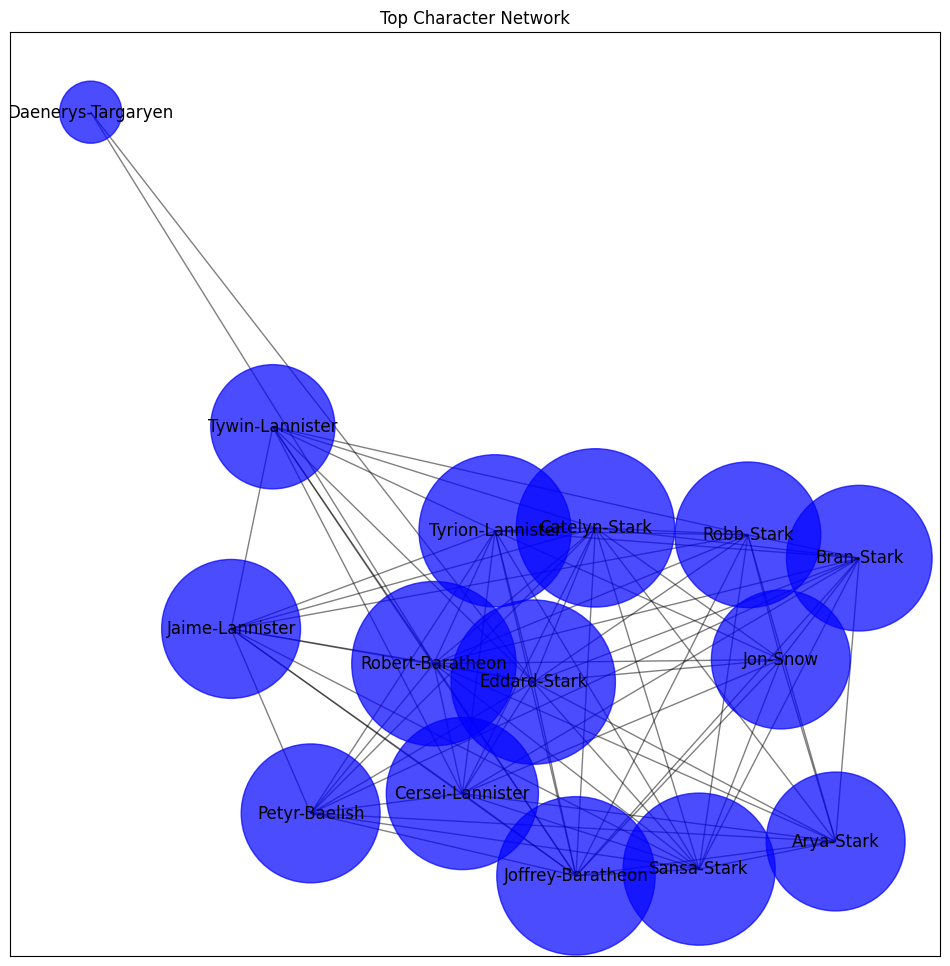

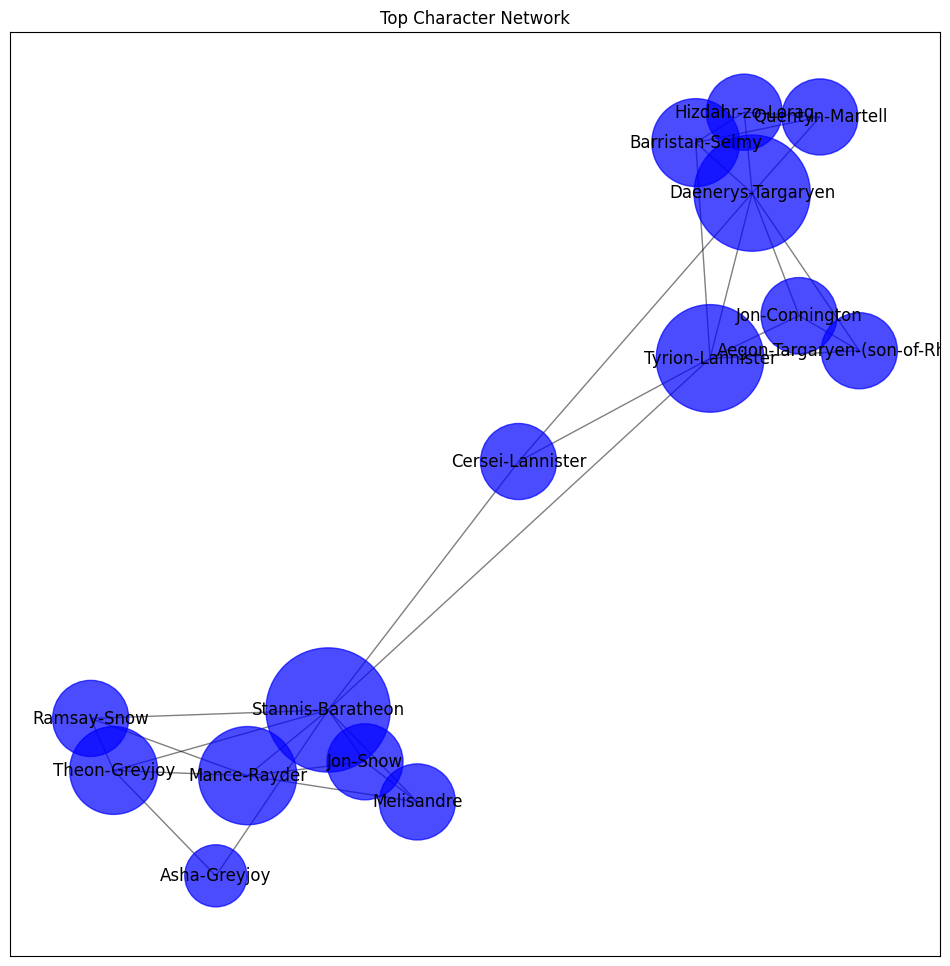

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network(graph, top_characters):
    # Create a subgraph with only the top characters and their direct connections
    top_nodes = [character for character, _ in top_characters]
    subgraph = graph.subgraph(top_nodes).copy()

    pos = nx.spring_layout(subgraph, seed=42)  # Fixed layout for reproducibility
    plt.figure(figsize=(12, 12))

    # Draw nodes with sizes proportional to their degree centrality
    node_sizes = [1000 * subgraph.degree(n) for n in subgraph.nodes()]
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.7)

    # Draw edges with transparency
    nx.draw_networkx_edges(subgraph, pos, alpha=0.5)

    # Draw labels for the top characters
    nx.draw_networkx_labels(subgraph, pos, font_size=12, font_color='black')

    plt.title('Top Character Network')
    plt.show()

# Draw network for the first book
draw_network(books[0], top_characters_book1)

# Draw network for the fifth book
draw_network(books[4], top_characters_book5)


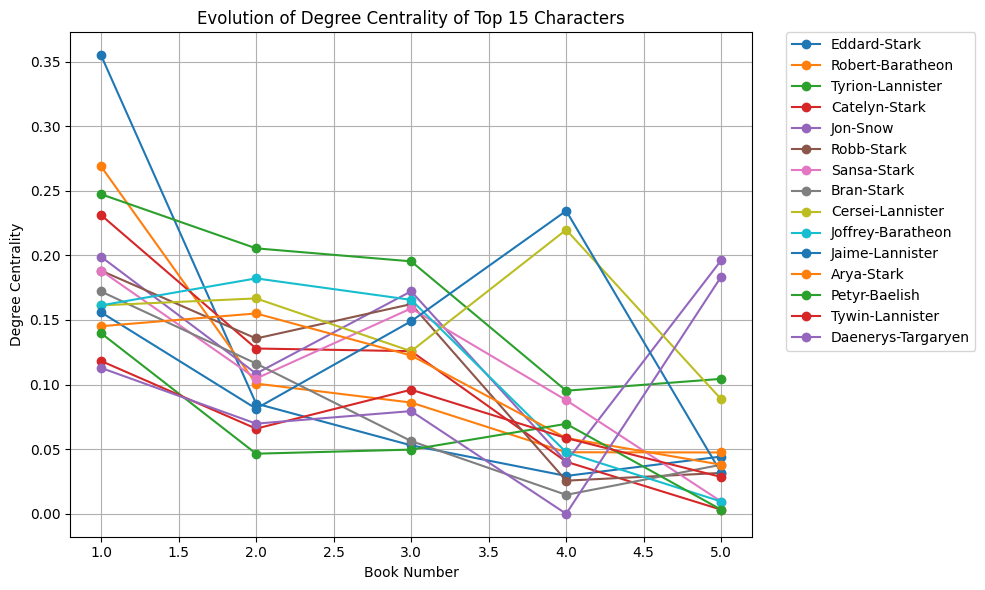

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

# Top 15 characters from the first book with their degree centrality values
top_15_characters = [
    ('Eddard-Stark', 0.3548387096774194),
    ('Robert-Baratheon', 0.2688172043010753),
    ('Tyrion-Lannister', 0.24731182795698928),
    ('Catelyn-Stark', 0.23118279569892475),
    ('Jon-Snow', 0.19892473118279572),
    ('Robb-Stark', 0.18817204301075272),
    ('Sansa-Stark', 0.18817204301075272),
    ('Bran-Stark', 0.17204301075268819),
    ('Cersei-Lannister', 0.16129032258064518),
    ('Joffrey-Baratheon', 0.16129032258064518),
    ('Jaime-Lannister', 0.15591397849462366),
    ('Arya-Stark', 0.14516129032258066),
    ('Petyr-Baelish', 0.13978494623655915),
    ('Tywin-Lannister', 0.11827956989247312),
    ('Daenerys-Targaryen', 0.11290322580645162)
]

# Extracting just the character names for easier plotting
top_15_characters_names = [character[0] for character in top_15_characters]

# Dictionary to store degree centrality evolution
degree_centrality_evolution = {character: [] for character, centrality in top_15_characters}

# Example: Assuming 'books' is a list of NetworkX Graphs
# Calculate degree centrality for each book and store it
for book in books:
    degree_centrality = nx.degree_centrality(book)
    for character, centrality in top_15_characters:
        if character in degree_centrality:
            degree_centrality_evolution[character].append(degree_centrality[character])
        else:
            degree_centrality_evolution[character].append(0)  # If character not in the book, centrality is 0

# Plotting the evolution
plt.figure(figsize=(10, 6))

for character in top_15_characters_names:
    plt.plot(range(1, len(books) + 1), degree_centrality_evolution[character], label=character, marker='o')

plt.xlabel('Book Number')
plt.ylabel('Degree Centrality')
plt.title('Evolution of Degree Centrality of Top 15 Characters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
import networkx as nx
import pandas as pd

# Assuming 'books' is a list of networkx Graph objects representing each book
# Function to calculate centrality measures for a given book
def calculate_centrality_measures(graph):
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

    # Create a DataFrame to store the centrality measures
    centrality_df = pd.DataFrame({
        'Degree Centrality': degree_centrality,
        'Betweenness Centrality': betweenness_centrality,
        'Closeness Centrality': closeness_centrality,
        'Eigenvector Centrality': eigenvector_centrality
    })

    return centrality_df

# Calculate centrality measures for each book and store in a list of DataFrames
centrality_measures = [calculate_centrality_measures(book) for book in books]

# Display the centrality measures for the first book
print(centrality_measures[0].head())


                    Degree Centrality  Betweenness Centrality  \
Addam-Marbrand               0.010753                 0.00000   
Jaime-Lannister              0.155914                 0.03201   
Tywin-Lannister              0.118280                 0.02619   
Aegon-I-Targaryen            0.010753                 0.00000   
Daenerys-Targaryen           0.112903                 0.08627   

                    Closeness Centrality  Eigenvector Centrality  
Addam-Marbrand                  0.323478                0.016907  
Jaime-Lannister                 0.461538                0.194958  
Tywin-Lannister                 0.449275                0.139390  
Aegon-I-Targaryen               0.376518                0.017385  
Daenerys-Targaryen              0.405229                0.047389  


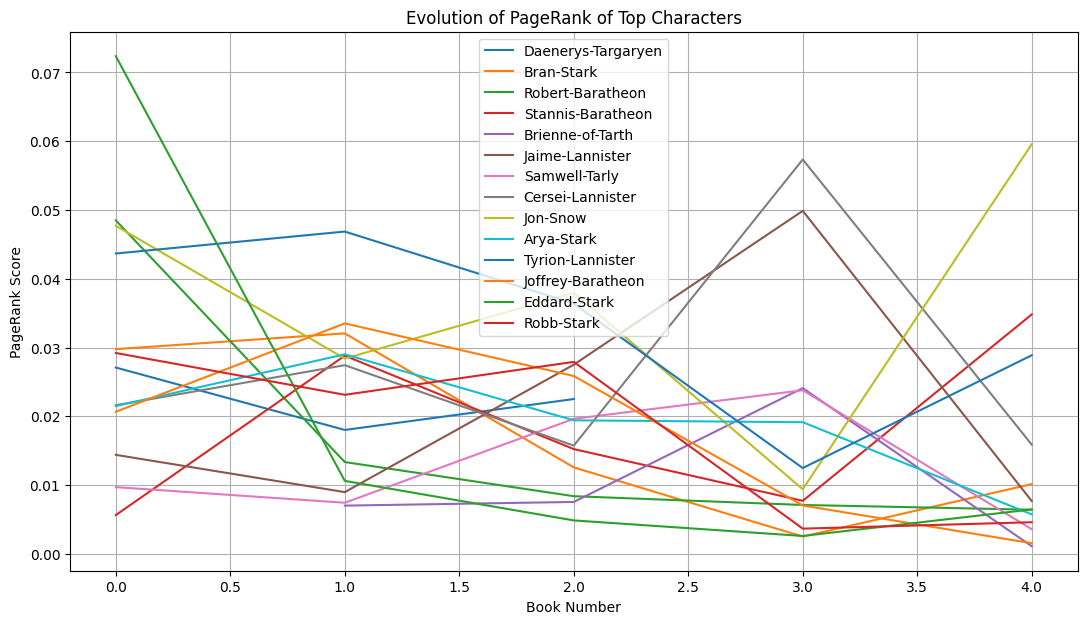

In [22]:
import matplotlib.pyplot as plt

# Calculate PageRank for each book and store in a list
pagerank_evol = [nx.pagerank(book) for book in books]

# Create a DataFrame from the PageRank evolution list
pagerank_evol_df = pd.DataFrame.from_records(pagerank_evol)

# Identify the top 4 characters in each book based on PageRank
set_of_char = set()
for i in range(5):  # Assuming there are 5 books
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of PageRank for the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))
plt.xlabel('Book Number')
plt.ylabel('PageRank Score')
plt.title('Evolution of PageRank of Top Characters')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Aggregate the centrality measures to find the overall most important character
# Create a DataFrame to store the aggregated scores
aggregated_scores = pd.DataFrame(index=centrality_measures[0].index)

# Sum the scores across all books for each centrality measure
for measure in centrality_measures[0].columns:
    aggregated_scores[measure] = sum(centrality_df[measure] for centrality_df in centrality_measures)

# Normalize the scores to ensure fair comparison
aggregated_scores = aggregated_scores.div(aggregated_scores.sum(axis=1), axis=0)

# Calculate the overall score as the mean of all normalized centrality measures
aggregated_scores['Overall Score'] = aggregated_scores.mean(axis=1)

# Identify the most important character based on the overall score
most_important_character = aggregated_scores['Overall Score'].idxmax()
most_important_score = aggregated_scores['Overall Score'].max()

print(f"The most important character overall is {most_important_character} with an overall score of {most_important_score:.4f}")


The most important character overall is Bran-Stark with an overall score of 0.2500
